# Growth decomposition

In [1]:
import pandas as pd
from IPython.display import display, HTML
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

path1 = './../../../../../media/miglesia/Elements/export_france/data/type1/DP1610_MAASTRICHT1_1997_2013'

display(HTML("<style>.container { width:100% !important; }</style>"))

### Growth rates (Aug 16)

In [2]:
df_04_13 = pd.read_csv(path1+'/samplings/time_sample_nw_detail_04_13.csv')

In [3]:
df_04_13.sample(10)

,YEAR,IMPORT,ID,CN ID 8,PYOD,VAT,VART_sum
1327426,2004,0,440966919,65059030,IT,IT0179724,173
14192853,2010,0,410038459,7052900,DE,DE0570289,15924
11818021,2009,0,399315613,19059060,DE,DE0207050,47
9035902,2008,0,342700648,85166070,NL,NL2052985,40
19965554,2013,0,308235175,20049091,GB,GB0056216,6004
8123306,2007,0,672014099,74071000,BE,BE0044620,4106
16297873,2011,0,398360123,33049900,DE,DE0601084,1515
3391764,2005,0,477902308,22042179,BE,BE2332781,1050
1370775,2004,0,448754283,61091000,IT,IT0315945,29
19819669,2012,0,954506077,85119000,DK,DK0046313,172


In [4]:
len(df_04_13)

22029841

(0, 3)

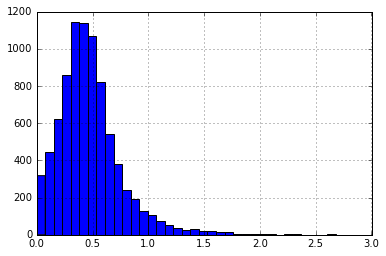

In [5]:
col = 'VAT'

sample = df_04_13.loc[df_04_13[col].isin(np.random.choice(df_04_13[col].unique(), 25000))]

df = sample
diff = np.log10(df.set_index([u'ID', u'CN ID 8', u'PYOD', u'VAT','YEAR'])[['VART_sum']]).unstack().diff(axis = 1)
growth = diff.stack().reset_index()

growth.groupby(col).std()['VART_sum'].hist(bins = 50)
plt.xlim(0, 3)

In [6]:
# x = np.log10(df.set_index([u'ID', u'CN ID 8', u'PYOD', u'VAT','YEAR'])[['VART_sum']]).unstack()

In [ ]:
col = 'CN ID 8'


In [ ]:
col = 'ID'

sample = df_04_13.loc[df_04_13[col].isin(np.random.choice(df_04_13[col].unique(), 25000))]

df = sample
diff = np.log10(df.set_index([u'ID', u'CN ID 8', u'PYOD', u'VAT','YEAR'])[['VART_sum']]).unstack().diff(axis = 1)
growth = diff.stack().reset_index()

growth.groupby(col).std()['VART_sum'].hist(bins = 50)
plt.xlim(0, 3)

### Growth rates (Aug 15)

In [ ]:
df_11_13 = pd.read_csv(path1+'/samplings/time_sample_nw_detail_11_13.csv')

df = df_11_13.loc[df_11_13.ID == 612039073].loc[df_11_13.VAT == 'PT0077741']


In [ ]:
np.log10(df.set_index([u'ID', u'CN ID 8', u'PYOD', u'VAT','YEAR'])[['VART_sum']]).unstack().diff(axis = 1)

In [ ]:
col = 'ID'
sample = df_04_13.loc[df_04_13[col].isin(np.random.choice(df_04_13[col].unique(), 25000))]

# df = df_04_13
df = sample
diff = np.log10(df.set_index([u'ID', u'CN ID 8', u'PYOD', u'VAT','YEAR'])[['VART_sum']]).unstack().diff(axis = 1)
growth = diff.stack().reset_index()

In [ ]:
# Randomising step
# growth['VART_sum'] = np.random.permutation(growth['VART_sum'])

In [ ]:
seller_coef = growth.groupby('ID')[['VART_sum']].mean()
buyer_coef = growth.groupby('VAT')[['VART_sum']].mean()
pair_coef = growth.groupby(['ID','VAT'])[['VART_sum']].mean()
year_coef = growth.groupby(['YEAR'])[['VART_sum']].mean()
prod_coef = growth.groupby(['CN ID 8'])[['VART_sum']].mean()
dest_coef = growth.groupby(['PYOD'])[['VART_sum']].mean()

In [ ]:
growth[['VART_sum']].mean()

In [ ]:
year_coef
dest_coef.sort_values(by = 'VART_sum')

In [ ]:
fig, axs = plt.subplots(1, 4, figsize = (25, 5))
dfs = [seller_coef, buyer_coef, pair_coef, prod_coef]
titles = ['seller_coef', 'buyer_coef', 'pair_coef', 'prod_coef']
for i in range(4):
    ax = axs[i]
    dfs[i].hist(bins = 100, ax = ax, normed = True)
    ax.set_xlim(-2, 2)
    ax.set_yscale('log')
    ax.set_title(titles[i])

In [ ]:
# df_13.groupby(['ID', 'VAT']).agg({'CN ID 8': 'nunique', 'PYOD':'nunique', 'VART_sum': 'sum'})

In [ ]:
df = df_11_13
df_by_VAT = df.groupby(['VAT']).agg({'CN ID 8': 'nunique', 'ID': 'nunique', 'PYOD':'nunique', 'VART_sum': 'sum'})
df_by_VAT.sort_values(by = 'ID', ascending = False).head(15)

In [ ]:
df_by_ID = df.groupby(['ID']).agg({'CN ID 8': 'nunique', 'VAT': 'nunique', 'PYOD':'nunique', 'VART_sum': 'sum'})
df_by_ID.sort_values(by = 'VAT', ascending = False).head(15)

In [ ]:
VAT_degree = df_by_VAT[['ID']].rename({'ID': 'ID_nunique'}, axis = 1).reset_index()
ID_degree = df_by_ID[['VAT']].rename({'VAT': 'VAT_nunique'}, axis = 1).reset_index()

In [ ]:
df_degrees = df_13.merge(ID_degree, on = 'ID').merge(VAT_degree, on = 'VAT')

In [ ]:


df_ = df_degrees
df_ = df_.merge(df_.groupby('VAT')[['VART_sum']].sum().reset_index().rename({'VART_sum': 'VAT_tot'}, axis = 1), on = 'VAT')
df_ = df_.merge(df_.groupby('ID')[['VART_sum']].sum().reset_index().rename({'VART_sum': 'ID_tot'}, axis = 1), on = 'ID')

df_['wt_in_VAT'] = df_['VART_sum'].div(df_['VAT_tot'])
df_['wt_in_ID'] = df_['VART_sum'].div(df_['ID_tot'])

df_['ID_wt_deg'] = df_['ID_nunique']*df_['wt_in_ID']
df_['VAT_wt_deg'] = df_['VAT_nunique']*df_['wt_in_VAT']

ID_wt_deg = df_.groupby('ID')[['ID_wt_deg']].sum().reset_index()
VAT_wt_deg = df_.groupby('VAT')[['VAT_wt_deg']].sum().reset_index()

In [ ]:
df_degrees = df_degrees.merge(ID_wt_deg).merge(VAT_wt_deg)

df_degrees = df_degrees.drop_duplicates(subset=['ID','VAT'])

In [ ]:
import numpy as np

In [ ]:
df_degrees['VAT_wt_deg_bin'] = pd.cut(np.log10(df_degrees['VAT_wt_deg']), 50)
df_degrees['ID_wt_deg_bin'] = pd.cut(np.log10(df_degrees['ID_wt_deg']), 50)

df_degrees['VAT_nunique_bin'] = pd.cut(np.log10(df_degrees['VAT_nunique']), 50)
df_degrees['ID_nunique_bin'] = pd.cut(np.log10(df_degrees['ID_nunique']), 50)

In [ ]:
fig, ax = plt.subplots(1, figsize = (6, 6))

sample = df_degrees.groupby(['ID_wt_deg_bin']).apply(lambda x: x.sample(500, replace = True))
sample[['ID_wt_deg', 'VAT_wt_deg']].plot(x = 'ID_wt_deg', y = 'VAT_wt_deg', alpha = .05, marker = '.', linewidth = 0, ax = ax)
                                                               
ax.set_xscale('log')
ax.set_xlim(1, 1000)
ax.set_yscale('log')
ax.set_ylim(1, 1000)

In [ ]:
df_degrees

fig, axs = plt.subplots(1,2, figsize = (10, 5))

ax = axs[0]
# df_degrees.groupby('VAT_wt_deg_bin')[['VAT_wt_deg', 'ID_nunique']].median().plot(x = 'VAT_wt_deg', y = 'ID_nunique', marker = '.', ax = ax)
df_degrees.groupby('VAT_wt_deg_bin')[['VAT_wt_deg', 'ID_nunique']].mean().plot(x = 'VAT_wt_deg', y = 'ID_nunique', marker = '.', linewidth = 0, ax = ax)
ax.set_xscale('log')
ax.set_yscale('log')

ax = axs[1]
# df_degrees.groupby('ID_wt_deg_bin')[['ID_wt_deg', 'VAT_nunique']].median().plot(x = 'ID_wt_deg', y = 'VAT_nunique', marker = '.', ax = ax)
df_degrees.groupby('ID_wt_deg_bin')[['ID_wt_deg', 'VAT_nunique']].mean().plot(x = 'ID_wt_deg', y = 'VAT_nunique', marker = '.', linewidth = 0, ax = ax)
ax.set_xscale('log')
ax.set_yscale('log')

In [ ]:
# df_degrees.groupby('VAT_wt_deg_bin')[['VAT_wt_deg', 'ID_wt_deg']].median()

fig, ax = plt.subplots(1)
df_degrees.groupby('VAT_nunique_bin')['VAT_nunique','ID_nunique'].quantile(.25).plot(x = 'VAT_nunique', y = 'ID_nunique', marker = '', ax = ax)
df_degrees.groupby('VAT_nunique_bin')['VAT_nunique','ID_nunique'].quantile(.5).plot(x = 'VAT_nunique', y = 'ID_nunique', marker = '', ax = ax)
df_degrees.groupby('VAT_nunique_bin')['VAT_nunique','ID_nunique'].quantile(.75).plot(x = 'VAT_nunique', y = 'ID_nunique', marker = '', ax = ax)
df_degrees.groupby('VAT_nunique')['ID_nunique'].median().plot(x = 'index', y = 'ID_nunique', marker = '.', linewidth = 0, ax = ax)
# df_degrees.groupby('VAT_nunique')['ID_nunique'].count().plot(y = 'ID_nunique', marker = '.', linewidth = 0, ax = ax)
ax.set_xscale('log')
ax.set_yscale('log')

In [ ]:
fig, ax = plt.subplots(1)
df_degrees.groupby('ID_nunique_bin')['VAT_nunique','ID_nunique'].quantile(.25).plot(x = 'ID_nunique', y = 'VAT_nunique', marker = '', ax = ax)
df_degrees.groupby('ID_nunique_bin')['VAT_nunique','ID_nunique'].quantile(.5).plot(x = 'ID_nunique', y = 'VAT_nunique', marker = '', ax = ax)
df_degrees.groupby('ID_nunique_bin')['VAT_nunique','ID_nunique'].quantile(.75).plot(x = 'ID_nunique', y = 'VAT_nunique', marker = '', ax = ax)

# df_degrees.groupby('ID_nunique_bin')['VAT_nunique','ID_nunique'].mean().plot(x = 'ID_nunique', y = 'VAT_nunique', marker = 'o', ax = ax)
df_degrees.groupby('ID_nunique')['VAT_nunique'].median().plot(x = 'index', y = 'VAT_nunique', marker = '.', linewidth = 0, ax = ax)
ax.set_xscale('log')
ax.set_yscale('log')